In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [96]:
from matplotlib import font_manager, rc
import matplotlib as mpl

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] == 'MS Gothic'

False

In [97]:
raw_1 = pd.read_csv('23년 기준 내국인 관심 관광지.csv', encoding='cp949')
raw_2 = pd.read_csv('2023_지역별 관광지 검색순위.csv', encoding='cp949')

In [98]:
visit_people = raw_1.copy()
navigation = raw_2.copy()

In [145]:
visit_people.head()

,시군구명,시도명,관광지명,Unnamed: 3,KTO카테고리대분류명,KTO카테고리중분류명,KTO카테고리소분류명,방문자수
0,성동구,서울특별시,서울숲,https://korean.visitkorea.or.kr/detail/ms_deta...,자연,자연관광지,자연생태관광지,16135
1,종로구,서울특별시,인사동,https://korean.visitkorea.or.kr/detail/ms_deta...,인문(문화/예술/역사),체험관광지,이색체험,14673
2,종로구,서울특별시,익선동,https://korean.visitkorea.or.kr/detail/ms_deta...,인문(문화/예술/역사),체험관광지,이색체험,11176
3,중구,서울특별시,동대문디자인플라자(DDP),https://korean.visitkorea.or.kr/detail/ms_deta...,인문(문화/예술/역사),산업관광지,기타,10636
4,용산구,서울특별시,남산서울타워,https://korean.visitkorea.or.kr/detail/ms_deta...,인문(문화/예술/역사),건축/조형물,유명건물,9087


In [99]:
navigation.head()

,순위,광역시/도,시/군/구,관광지명,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,서울특별시,강서구,김포국제공항국내선,서울 강서구 하늘길 111-0,기타관광,교통시설,1892097
1,2,서울특별시,영등포구,더현대서울,서울 영등포구 여의대로 108-0,쇼핑,백화점,977696
2,3,서울특별시,용산구,서울역,서울 용산구 한강대로 405-0,기타관광,교통시설,949849
3,4,서울특별시,강남구,SRT수서역,서울 강남구 밤고개로 99-0,기타관광,교통시설,910814
4,5,서울특별시,강남구,코엑스,서울 강남구 영동대로 513-0,문화관광,전시시설,727183


### 방식 1 정규화

In [ ]:
navigation_re = navigation[['관광지명','검색건수']]
visit_people_re = visit_people[['관광지명','방문자수']]

navigation_re['norm_navi'] = round((navigation_re['검색건수'] / navigation_re['검색건수'].max()),4)
navigation_re_norm = navigation_re[['관광지명','norm_navi']].copy()

visit_people_re['norm_visit'] = round((visit_people_re['방문자수'] / visit_people_re['방문자수'].max()),4)
visit_people_re_norm = visit_people_re[['관광지명','norm_visit']].copy()

tourist_attraction_norm = pd.merge(navigation_re_norm, visit_people_re_norm, on='관광지명', how='inner').copy()

### 방식 2 정규화

In [ ]:
navigation_re_2 = navigation[['관광지명','검색건수']]
visit_people_re_2 = visit_people[['관광지명','방문자수']]

basic_merge = pd.merge(visit_people_re_2, navigation_re_2, on='관광지명', how='inner').copy()
basic_merge_df = basic_merge[['방문자수', '검색건수']]

In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
basic_merge_df_normal = scaler.fit_transform(basic_merge_df)
basic_merge_df_normal_2 = pd.DataFrame(basic_merge_df_normal, columns=basic_merge_df.columns)

In [119]:
basic_merge_df_normal_2.columns

Index(['방문자수', '검색건수'], dtype='object')

### 페어플롯

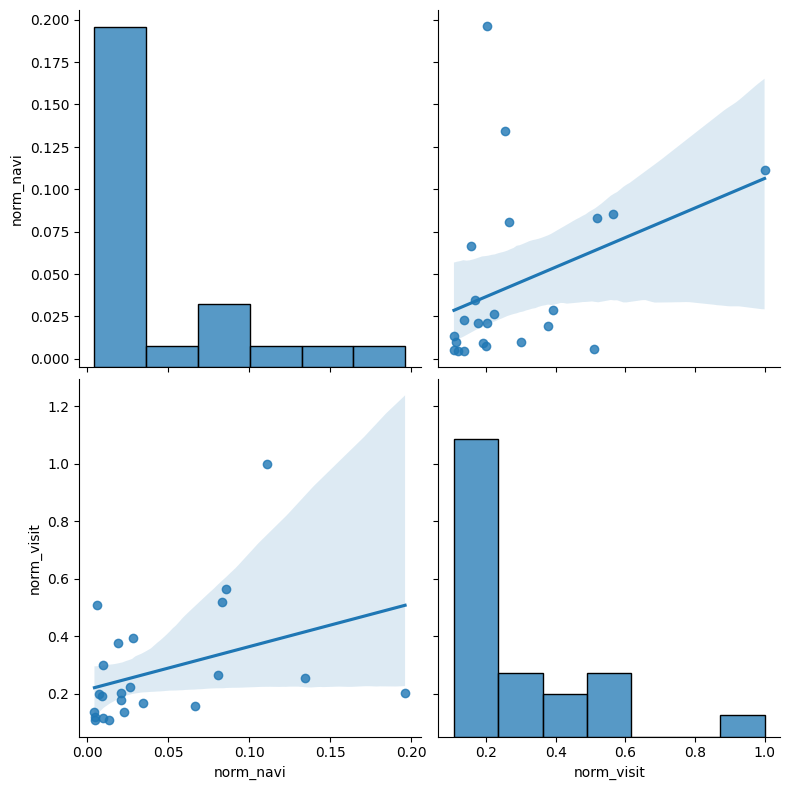

In [ ]:
sns.pairplot(data=tourist_attraction_norm, vars=['norm_navi', 'norm_visit'],
             kind='reg', height=4)

plt.show()

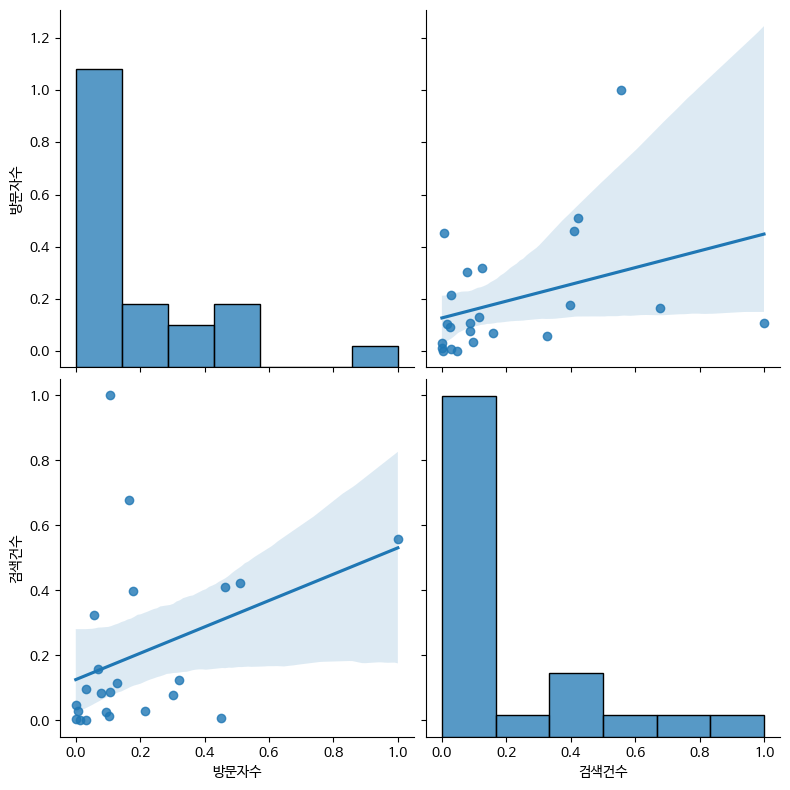

In [121]:
plt.rc('font', family='NanumBarunGothic')

sns.pairplot(data=basic_merge_df_normal_2, vars=['방문자수', '검색건수'],
             kind='reg', height=4)

plt.show()
# basic_merge_df_normal_2

<function matplotlib.pyplot.show(close=None, block=None)>

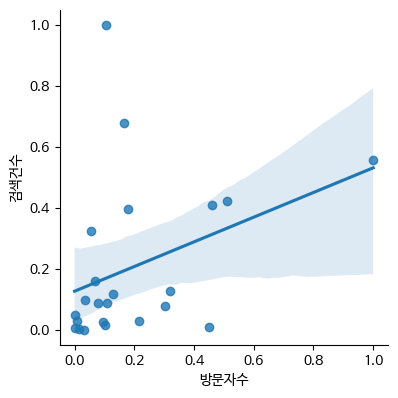

In [138]:
sns.pairplot(
    data = basic_merge_df_normal_2,
    x_vars=['방문자수'],
    y_vars=['검색건수'],
    kind = 'reg',
    height=4
)
# vars : variables 변수

plt.show